In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..

C:\Users\User\Documents\Studia\Masters Thesis\reconchess-strangefish2


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df1 = pd.read_csv('uncertainty_model/uncertainty_lstm_2/model_history_log.csv')
df2 = pd.read_csv('uncertainty_model/uncertainty_lstm_3/model_history_log.csv')
df3 = pd.read_csv('uncertainty_model/uncertainty_lstm_4/lstm_model_history_log.csv')
df = df1.append(df2).append(df3)

# df = pd.read_csv('uncertainty_model/uncertainty_transformer_3/model_history_log.csv')

In [7]:

df.epoch = np.arange(len(df))
df

,epoch,loss,val_loss
0,0,0.081770,0.069551
1,1,0.076691,0.035848
2,2,0.035762,0.034896
3,3,0.034516,0.034471
0,4,0.035048,0.035247
1,5,0.037069,0.035220
2,6,0.034297,0.033406
3,7,0.033328,0.032749
4,8,0.032564,0.032047
5,9,0.031860,0.031148


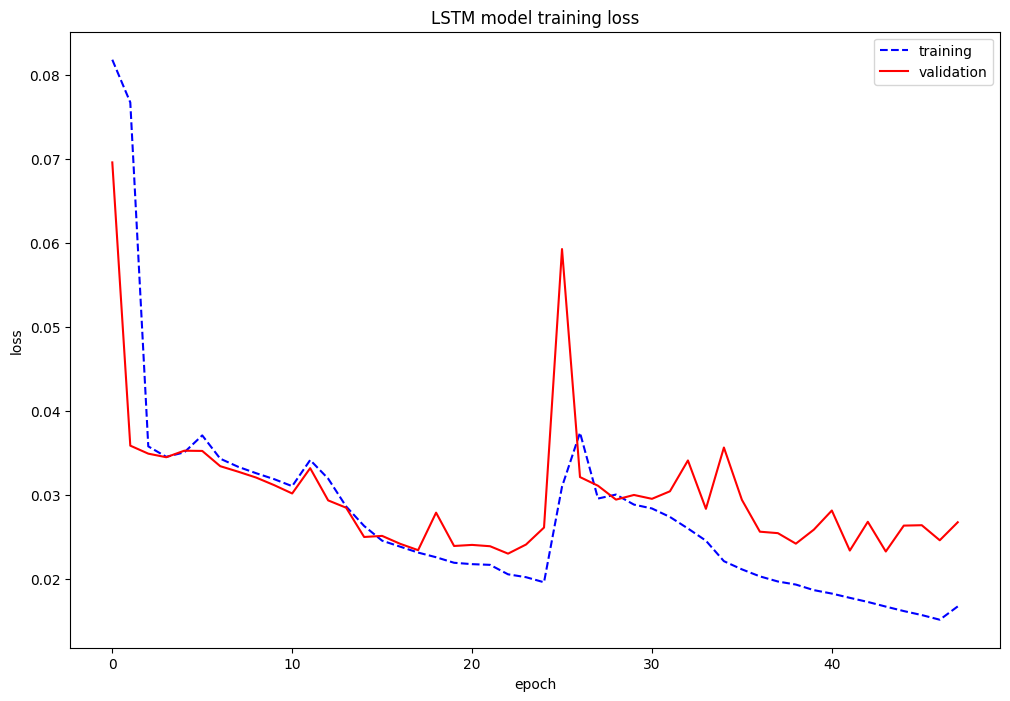

0     0.081770
1     0.076691
2     0.035762
3     0.034516
0     0.035048
1     0.037069
2     0.034297
3     0.033328
4     0.032564
5     0.031860
6     0.031028
7     0.034138
8     0.031923
9     0.028609
10    0.026289
11    0.024542
12    0.023833
13    0.023125
14    0.022570
15    0.021912
16    0.021747
17    0.021665
18    0.020538
19    0.020195
20    0.019590
21    0.030964
22    0.037396
23    0.029554
24    0.030027
25    0.028832
26    0.028373
27    0.027364
28    0.025992
29    0.024540
30    0.022101
31    0.021129
32    0.020293
33    0.019684
34    0.019319
35    0.018656
0     0.018246
1     0.017740
2     0.017251
3     0.016697
4     0.016166
5     0.015689
6     0.015136
7     0.016720
Name: loss, dtype: float64

In [9]:
plt.figure(figsize=(12, 8))

plt.title("LSTM model training loss")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(df.epoch, df.loss, 'b--', label="training")
plt.plot(df.epoch, df.val_loss, 'r', label="validation")
plt.legend()

plt.savefig('analysis/imgs/uncertainty_model_training_loss_lstm.png')
plt.show()
df.loss

In [11]:
df = pd.read_csv('uncertainty_model/uncertainty_transformer_3/transformer_model_history_log.csv')
df

,Unnamed: 0,epoch,loss,val_loss
0,0,0,0.090239,0.089302
1,1,1,0.090099,0.089302
2,2,2,0.090059,0.089302
3,3,3,0.090063,0.088703
4,4,4,0.088843,0.090335
5,5,5,0.087681,0.088208
6,6,6,0.087341,0.086353
7,7,7,0.087525,0.086486


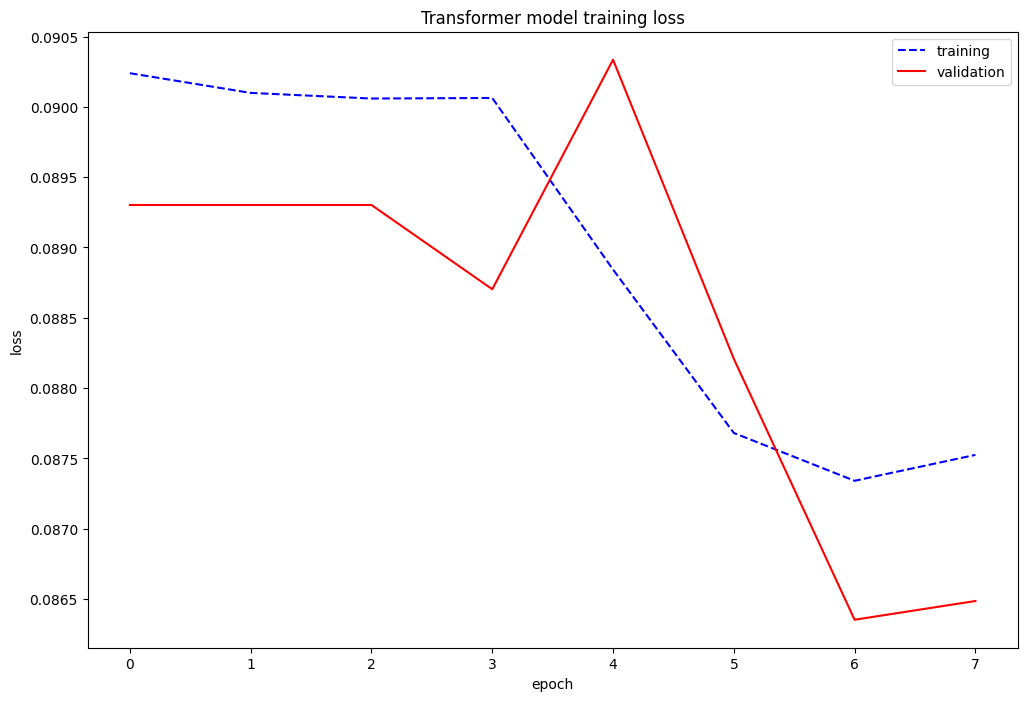

0    0.090239
1    0.090099
2    0.090059
3    0.090063
4    0.088843
5    0.087681
6    0.087341
7    0.087525
Name: loss, dtype: float64

In [12]:
plt.figure(figsize=(12, 8))

plt.title("Transformer model training loss")
plt.xlabel("epoch")
plt.ylabel("loss")

plt.plot(df.epoch, df.loss, 'b--', label="training")
plt.plot(df.epoch, df.val_loss, 'r', label="validation")
plt.legend()

plt.savefig('analysis/imgs/uncertainty_model_training_loss_transformer.png')
plt.show()
df.loss

In [15]:
from strangefish.models.model_training_utils import GameHistorySequence
from strangefish.models.uncertainty_transformer import uncertainty_transformer_1, uncertainty_transformer_vis
from strangefish.models.uncertainty_lstm import uncertainty_lstm_1

model = uncertainty_transformer_vis()
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)
# for layer, name in zip(model.layers, ["Input Layer", "Masking", "Reshape", "Transformer Block", "Dropout 1", "Dense", "Dropout 2", "Output"]):
#     layer.name = name
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 8, 8, 37)]  0         
                                                                 
 masking (Masking)           (None, None, 8, 8, 37)    0         
                                                                 
 reshape (Reshape)           (None, None, 2368)        0         
                                                                 
 transformer_block (Transfor  (None, None, 2368)       45190976  
 merBlock)                                                       
                                                                 
 dropout_1 (Dropout)         (None, None, 2368)        0         
                                                                 
 dense (Dense)               (None, None, 64)          151616    
                                                             

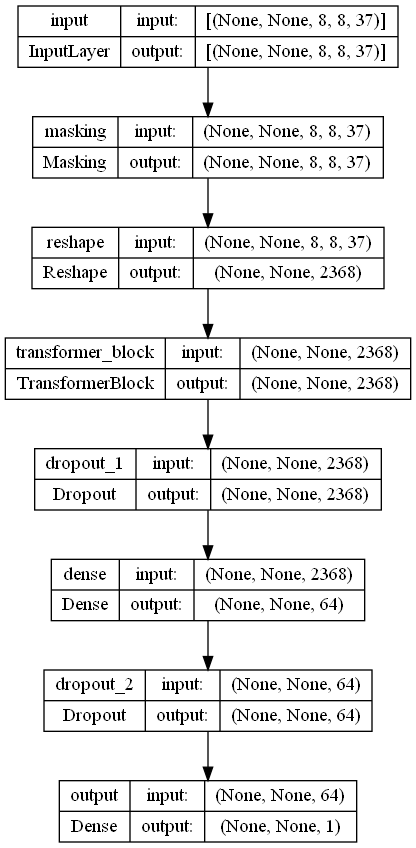

In [16]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from keras.models import Model
# model = Sequential()
# model.add(Dense(2, input_dim=1, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [17]:
import keras
import numpy as np
from strangefish.models.uncertainty_transformer import TransformerBlock

input = keras.layers.Input(name='input', shape=(None, None, 2368), dtype=float)
input_dim = (None, 8, 8, 37)
input_len = np.prod(input_dim[1:])
tf = TransformerBlock(input_len, 2, 64, 0.1)(input)

plot_model(Model(input, tf.layernorm2), to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

AttributeError: 'KerasTensor' object has no attribute 'layernorm2'

In [18]:
%load_ext autoreload
%autoreload 2

import os

import numpy as np
import pandas as pd

from strangefish.models.model_training_utils import GameHistorySequence
from strangefish.models.uncertainty_transformer import uncertainty_transformer_1

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
model = uncertainty_lstm_1()

model.summary()
model.load_weights('uncertainty_model/uncertainty_lstm_4/weights')
from sklearn.model_selection import train_test_split

data_path = 'game_logs/historical_games_extended'

files = os.listdir(data_path)
files.sort()

train_data, test_data = train_test_split(files, test_size=0.2, random_state=42)

pd.DataFrame({'files': train_data}).to_csv('uncertainty_model/train_data.csv')
pd.DataFrame({'files': test_data}).to_csv('uncertainty_model/test_data.csv')
training_sequence = GameHistorySequence(train_data, data_path, 16)
test_sequence = GameHistorySequence(test_data, data_path, 16, shuffle=False)

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, None, 8, 8, 37)]  0         
                                                                 
 masking (Masking)           (None, None, 8, 8, 37)    0         
                                                                 
 conv_1 (Conv2D)             (None, None, 6, 6, 128)   42752     
                                                                 
 norm_1 (BatchNormalization)  (None, None, 6, 6, 128)  512       
                                                                 
 activation_1 (Activation)   (None, None, 6, 6, 128)   0         
                                                                 
 dropout_1 (Dropout)         (None, None, 6, 6, 128)   0         
                                                                 
 conv_2 (Conv2D)             (None, None, 4, 4, 256)   2951

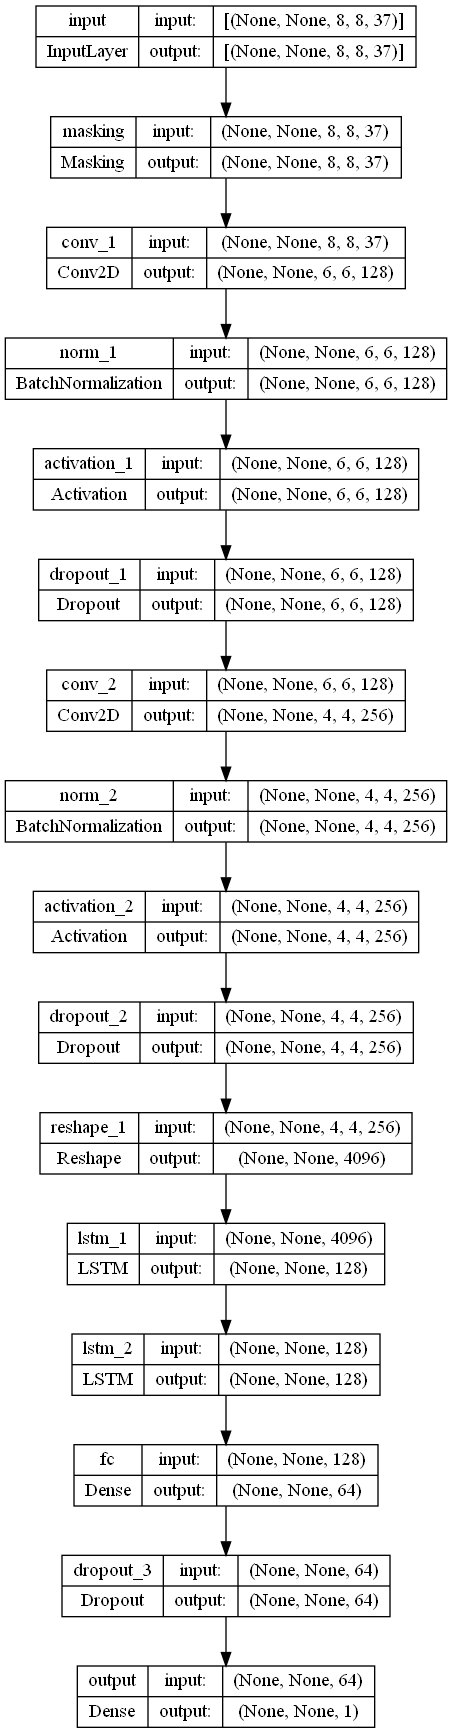

In [20]:
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, expand_nested=True)

In [21]:
data = test_sequence.__getitem__(0)

In [22]:
samples = np.where([np.sum(y != -1) > 10 for y in data[1]])[0]
samples

array([ 0,  1,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 18, 19],
      dtype=int64)

1/1 [==============================] - 0s 26ms/step


[]

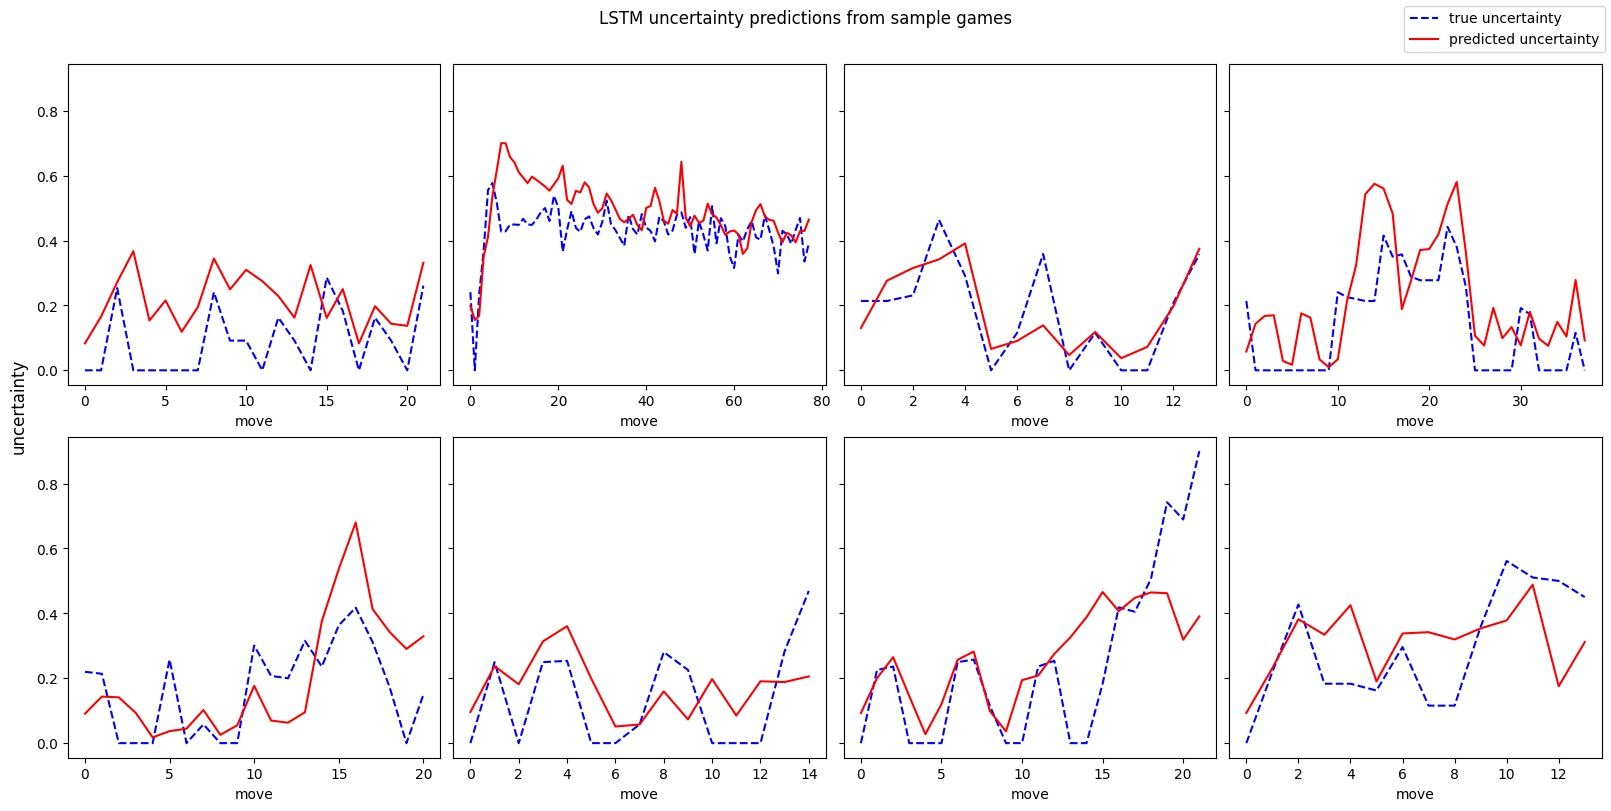

In [33]:
nrow = 2
ncol = 4
fig, axs = plt.subplots(nrow, ncol, figsize=(16, 8), constrained_layout=True, sharey=True)

for idx in range(nrow * ncol):
    ax = axs[idx%nrow][idx//nrow]

    i = samples[idx]
    x, y = data[0][i], data[1][i]

    y_pred = model.predict(np.array([x]))[0]

    valid = y != -1

    ax.plot(y[valid], 'b--', label='true uncertainty')
    ax.plot(y_pred[valid], 'r', label='predicted uncertainty')
    ax.set_xlabel('move')
    # if idx//2 == 0:
    #     ax.set_ylabel('uncertainty')

fig.supylabel('uncertainty')
fig.suptitle('LSTM uncertainty predictions from sample games')
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='outside upper right')

plt.savefig('analysis/imgs/uncertainty_model_predictions_lstm.png')
plt.plot()

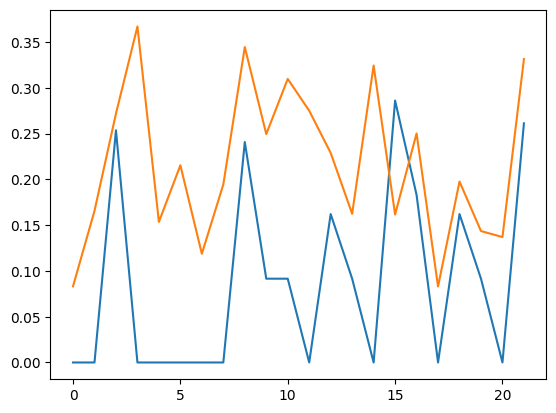